# <center>Ë±ÜÁì£Âõæ‰π¶ÂàÜÊûê</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import types
import re

### 1. Áà¨ÂèñÊüêÂõæ‰π¶‚ΩπÁΩëÁ´ôÔºåÂæóÂà∞Âõæ‰π¶Êï∞ÊçÆÔºåÂπ∂ÂØºÂÖ•pandas

In [2]:
import pymysql

In [3]:
conn = pymysql.connect(host='localhost', user='root', password='1999.04.25', db='book', charset='utf8')

In [4]:
sql = 'select * from book;'
data = pd.read_sql(sql, conn)
data.head()

id      nid    title author  publisher translators publication  \
0   2  1584537  ‰∏≠ÂõΩËØóÊ≠åÊ∫êÊµÅÂè≤    Ëé´ÊûóËôé  ‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ                  2002.4   
1   3  1394349      ÂÖÉËØóÂè≤     Êù®Èï∞    ‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ                    2003   
2   4  1203363   ‰∏≠ÂõΩÂ∞èËØ¥Âè≤Áï•     È≤ÅËøÖ    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ              1998-01-01   
3   5  1200352   ÂîêÂÆãËØçÊµÅÊ¥æÂè≤    ÂàòÊâ¨Âø†    Á¶èÂª∫‰∫∫Ê∞ëÂá∫ÁâàÁ§æ                  2007-4   
4   6  1134261    ÂîêÂÆãËØçÂè≤ËÆ∫    ÁéãÂÖÜÈπè   \n                        2000-1   

  originalname framed           isbn pagenumber   price       books  \
0                      9787500429395               28.0        None   
1                  Âπ≥Ë£Ö  9787020042371        750   42.00        None   
2                  Âπ≥Ë£Ö  9787532523337        297   12.90       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   
3                      9787211033058        457  30.00ÂÖÉ        None   
4                      9787020030842        387  18.00ÂÖÉ  ‰∏≠ÂõΩÂè§ÂÖ∏ÊñáÂ≠¶Á†îÁ©∂‰∏õ‰π¶   

  numberofreviews score  
0              12   7.6  
1              16   7.5  
2            1081   9.1  
3                        
4              28   8.5

In [5]:
data.tail()

id       nid         title               author  publisher  \
224630  419807   3869737        ÁëûÂÖ∏ËØ≠‰∏âÁôæÂè•  ÁéãÊ¢¶Ëææ|ÔºàÁëûÔºâLars|Bergman    Âåó‰∫¨Â§ßÂ≠¶Âá∫ÁâàÁ§æ   
224631  419810   4250737  Â§ßÁà≠‰πã‰∏ñ Âç∑ÂõõÔºöÂ§ßÁõúÊú¨Ëâ≤                              È´òÂØ∂   
224632  419814  11534920       ‰∏âÂõΩÊú∫ÂØÜÔºà‰∏ãÔºâ                  È©¨‰ºØÂ∫∏    Ê±üËãè‰∫∫Ê∞ëÂá∫ÁâàÁ§æ   
224633  419815  21355149   ‰∏çÂ≠òÂú®Êú™Âá∫ÁâàÁöÑÈîôËØØÊù°ÁõÆ                                   
224634  419816  25734399     Èî¶Ë°£Â§úË°å5¬∑ÈÄçÈÅ•Ê∏∏                   ÊúàÂÖ≥  ÊπñÂåóÂ∞ëÂπ¥ÂÑøÁ´•Âá∫ÁâàÁ§æ   

       translators  publication originalname framed           isbn pagenumber  \
224630                 2009-6-1                  Âπ≥Ë£Ö  9787301152140      250 È°µ   
224631              2010Âπ¥01Êúà20Êó•                  Âπ≥Ë£ù  9789861854120        304   
224632                   2012-8                  Âπ≥Ë£Ö  9787214086341        367   
224633                     1900                      9787102503042              
224634                   2013-7                  Âπ≥Ë£Ö  9787535390264        289   

         price books numberofreviews score  
224630  25.00ÂÖÉ  None              24   8.2  
224631  NTD260  Â§ßÁà≠‰πã‰∏ñ              55   7.3  
224632  36.00ÂÖÉ  ‰∏âÂõΩÊú∫ÂØÜ            3585   7.9  
224633          None              29   7.5  
224634  25.00ÂÖÉ  Èî¶Ë°£Â§úË°å              38   7.9

### 2. ÂØπÊï∞ÊçÆÂÅöÊ∏ÖÊ¥ó(Áº∫Â§±ÂÄº‰∏éÂºÇÂ∏∏ÂÄº)

#### ÂêéÈù¢ÂØπÊï∞ÊçÆËøõË°åÂàÜÊûêÊó∂‰ºöÊ∂âÂèäÂà∞Âπ¥‰ªΩ(publication)„ÄÅËØÑÂàÜ(score)„ÄÅ‰ª∑Ê†º(price)„ÄÅÂá∫ÁâàÁ§æ(publisher)„ÄÅ‰ΩúËÄÖ(author)„ÄÅËØÑËÆ∫Êï∞Èáè(numberofreviews)
##### ÊØè‰∏Ä‰∏™Êï∞ÊçÆÂàÜÊûêÂØπÊï∞ÊçÆÁöÑË¶ÅÊ±ÇÂùá‰∏çÂêåÔºåÊâÄ‰ª•Êï∞ÊçÆÊ∏ÖÊ¥óÊàëÂ∞ÜÂú®ÊØè‰∏ÄÊ¨°Êï∞ÊçÆÂàÜÊûê‰πãÂâçÂçïÁã¨ËøõË°å‰∏ÄÊ¨°Ê∏ÖÊ¥ó
#### ËøôÈáåÊàëÂè™ËøõË°åÂ∞ÜÂÖ®ÈÉ®ÈÉΩ‰∏∫Á©∫ÁöÑÊï∞ÊçÆÊ∏ÖÁêÜÊéâÁöÑÊìç‰Ωú

In [6]:
data.isnull().sum()

id                 0
nid                0
title              0
author             0
publisher          0
translators        0
publication        0
originalname       0
framed             0
isbn               0
pagenumber         0
price              0
books              0
numberofreviews    0
score              0
dtype: int64

‰∏äÈù¢ÁöÑÁªìÊûúËØ¥ÊòéÊ≤°Êúâ‰∏ÄÂàóÊâÄÊúâÊï∞ÊçÆÂÖ®‰∏∫Á©∫ÁöÑÊï∞ÊçÆ

### 3. ÂàÜÊûê‰π¶ÁöÑÊï∞Èáè‰∏éÂπ¥‰ªΩÁöÑÂÖ≥Á≥ª

(1) „ÄêÁº∫Â§±ÂÄº„ÄëÂà§Êñ≠‰∏éÊ∏ÖÊ¥ó

In [7]:
data1 = data[(data['publication']!='') | (data['publication']!=None)]
len(data1)

224635

In [8]:
len(data)

224635

##### ‰∏äÈù¢ÁöÑÁªìÊûúËØ¥ÊòéÔºöÊâÄÊúâÊï∞ÊçÆÈÉΩÊúâÂπ¥‰ªΩËøô‰∏ÄÂàóÁöÑÊï∞ÊçÆÔºå‰∏çÈúÄË¶ÅËøõË°åÊï∞ÊçÆ„ÄêÁº∫Â§±ÂÄº„ÄëÁöÑÊ∏ÖÊ¥ó

Ôºà2ÔºâÊï∞ÊçÆ„ÄêÂºÇÂ∏∏ÂÄº„ÄëÁ¨¨‰∏ÄÊ¨°Ê∏ÖÊ¥ó

In [9]:
i = 0
new_data = []
for year in data1.publication:
    year = str(year)
    if re.match('^.*?[0-9]{4}.*$', year)!=None:
        new_data.append(data1.iloc[i])
    i += 1
len(new_data)

218282

In [10]:
new_data1 = pd.DataFrame(new_data)
len(new_data1)

218282

In [11]:
new_data1.head()

id      nid    title author  publisher translators publication  \
0   2  1584537  ‰∏≠ÂõΩËØóÊ≠åÊ∫êÊµÅÂè≤    Ëé´ÊûóËôé  ‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ                  2002.4   
1   3  1394349      ÂÖÉËØóÂè≤     Êù®Èï∞    ‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ                    2003   
2   4  1203363   ‰∏≠ÂõΩÂ∞èËØ¥Âè≤Áï•     È≤ÅËøÖ    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ              1998-01-01   
3   5  1200352   ÂîêÂÆãËØçÊµÅÊ¥æÂè≤    ÂàòÊâ¨Âø†    Á¶èÂª∫‰∫∫Ê∞ëÂá∫ÁâàÁ§æ                  2007-4   
4   6  1134261    ÂîêÂÆãËØçÂè≤ËÆ∫    ÁéãÂÖÜÈπè   \n                        2000-1   

  originalname framed           isbn pagenumber   price       books  \
0                      9787500429395               28.0        None   
1                  Âπ≥Ë£Ö  9787020042371        750   42.00        None   
2                  Âπ≥Ë£Ö  9787532523337        297   12.90       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   
3                      9787211033058        457  30.00ÂÖÉ        None   
4                      9787020030842        387  18.00ÂÖÉ  ‰∏≠ÂõΩÂè§ÂÖ∏ÊñáÂ≠¶Á†îÁ©∂‰∏õ‰π¶   

  numberofreviews score  
0              12   7.6  
1              16   7.5  
2            1081   9.1  
3                        
4              28   8.5

(3) Áªü‰∏ÄÂπ¥‰ªΩÁöÑÊ†ºÂºè

In [12]:
# ‰∏ãÈù¢Ëøô‰∏ÄÊÆµ‰ª£Á†ÅËé∑Âèñ‰π¶ÁöÑÂπ¥‰ªΩÂπ∂ËΩ¨‰∏∫4‰ΩçÊï∞Â≠óÂ≠óÁ¨¶ÊõøÊç¢ÂéüÊù•‰∏çÂêåËßÑÂàôÁöÑÂπ¥‰ªΩÔºåÊñπ‰æøÂêéÈù¢ÁªüËÆ°ÂàÜÊûê
publication = []
for year in new_data1.publication:
    yearstr = str(year)
    yearstr = re.search(r'^.*?([0-9]{4}).*$', yearstr).group(1)[:4]
    yearstr = int(yearstr)
    publication.append(yearstr)
print(len(publication))

218282


Â∞Ünew_data1‰∏≠ÁöÑ publication ÊõøÊç¢ÊàêÁªü‰∏ÄÂêéÁöÑÊ†ºÂºè

In [13]:
new_data1['publication'] = publication
new_data1.head()

id      nid    title author  publisher translators  publication  \
0   2  1584537  ‰∏≠ÂõΩËØóÊ≠åÊ∫êÊµÅÂè≤    Ëé´ÊûóËôé  ‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ                     2002   
1   3  1394349      ÂÖÉËØóÂè≤     Êù®Èï∞    ‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ                     2003   
2   4  1203363   ‰∏≠ÂõΩÂ∞èËØ¥Âè≤Áï•     È≤ÅËøÖ    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ                     1998   
3   5  1200352   ÂîêÂÆãËØçÊµÅÊ¥æÂè≤    ÂàòÊâ¨Âø†    Á¶èÂª∫‰∫∫Ê∞ëÂá∫ÁâàÁ§æ                     2007   
4   6  1134261    ÂîêÂÆãËØçÂè≤ËÆ∫    ÁéãÂÖÜÈπè   \n                           2000   

  originalname framed           isbn pagenumber   price       books  \
0                      9787500429395               28.0        None   
1                  Âπ≥Ë£Ö  9787020042371        750   42.00        None   
2                  Âπ≥Ë£Ö  9787532523337        297   12.90       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   
3                      9787211033058        457  30.00ÂÖÉ        None   
4                      9787020030842        387  18.00ÂÖÉ  ‰∏≠ÂõΩÂè§ÂÖ∏ÊñáÂ≠¶Á†îÁ©∂‰∏õ‰π¶   

  numberofreviews score  
0              12   7.6  
1              16   7.5  
2            1081   9.1  
3                        
4              28   8.5

Ôºà4ÔºâÊï∞ÊçÆ„ÄêÂºÇÂ∏∏ÂÄº„ÄëÁ¨¨‰∫åÊ¨°Ê∏ÖÊ¥ó--ÂØπÂπ¥‰ªΩËøõË°åÈôêÂà∂

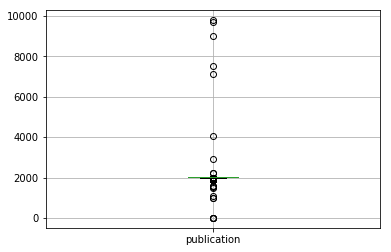

In [14]:
new_data1[['publication']].boxplot()
plt.show()

Áî±‰∏äÈù¢ÁöÑÁÆ±Á∫øÂõæÊàë‰ª¨Áü•ÈÅìÔºöÊúâÈÉ®ÂàÜÊï∞ÊçÆÁöÑÂπ¥‰ªΩÂ≠òÂú®ÈóÆÈ¢òÔºåÊàë‰ª¨ÈúÄË¶ÅÈô§ÂéªËøôÈÉ®ÂàÜÊï∞ÊçÆ

In [15]:
data1 = new_data1[(new_data1['publication']<=2018) & (new_data1['publication']>=1920)]
len(data1)

217746

In [16]:
data1.head()

id      nid    title author  publisher translators  publication  \
0   2  1584537  ‰∏≠ÂõΩËØóÊ≠åÊ∫êÊµÅÂè≤    Ëé´ÊûóËôé  ‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ                     2002   
1   3  1394349      ÂÖÉËØóÂè≤     Êù®Èï∞    ‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ                     2003   
2   4  1203363   ‰∏≠ÂõΩÂ∞èËØ¥Âè≤Áï•     È≤ÅËøÖ    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ                     1998   
3   5  1200352   ÂîêÂÆãËØçÊµÅÊ¥æÂè≤    ÂàòÊâ¨Âø†    Á¶èÂª∫‰∫∫Ê∞ëÂá∫ÁâàÁ§æ                     2007   
4   6  1134261    ÂîêÂÆãËØçÂè≤ËÆ∫    ÁéãÂÖÜÈπè   \n                           2000   

  originalname framed           isbn pagenumber   price       books  \
0                      9787500429395               28.0        None   
1                  Âπ≥Ë£Ö  9787020042371        750   42.00        None   
2                  Âπ≥Ë£Ö  9787532523337        297   12.90       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   
3                      9787211033058        457  30.00ÂÖÉ        None   
4                      9787020030842        387  18.00ÂÖÉ  ‰∏≠ÂõΩÂè§ÂÖ∏ÊñáÂ≠¶Á†îÁ©∂‰∏õ‰π¶   

  numberofreviews score  
0              12   7.6  
1              16   7.5  
2            1081   9.1  
3                        
4              28   8.5

Ôºà5ÔºâÂºÄÂßãÂàÜÊûêÂπ¥‰ªΩ‰∏éÊï∞Èáè‰πãÈó¥ÁöÑÂÖ≥Á≥ª

In [17]:
x = np.arange(1920, 2019)      # Áî®Êù•‰Ωú‰∏∫ÊâÄÊúâÂπ¥‰ªΩ
x

array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [18]:
y = np.zeros(2019-1920, dtype=int)     # Áî®yÊù•‰ª£ÊõøÊØè‰∏ÄÂπ¥‰π¶Á±çÁöÑÊï∞ÈáèÔºåÂàùÂßãÂÄºÊØèÂπ¥ÈÉΩ‰∏∫0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
len(x)

99

In [20]:
len(y)

99

In [21]:
for n in data1['publication']:
    index = 0
    for x_data in x:
        if n==x_data:
            y[index] += 1
        index += 1

In [22]:
y

array([    1,     1,     0,     2,     2,     2,     0,     4,     5,
           3,     5,     3,     1,     2,     3,     3,     5,     5,
           4,     1,     2,     2,     1,     1,     4,     1,     3,
           3,     1,    10,    12,     6,    11,    21,    25,    40,
          79,   103,   120,   111,    50,    56,   103,    90,    53,
          72,    42,    25,    21,    34,   395,    48,    72,   120,
          92,   108,   119,   138,   232,   419,   456,   603,   603,
         716,   744,   755,   786,   873,   941,   941,   841,  1039,
        1211,  1260,  1426,  1533,  2204,  2717,  3520,  3841,  4411,
        5174,  6498,  8293, 10541, 12292, 13636, 14525, 14925, 15691,
       15635, 15462, 13433, 10658,  8742,  7672,  6666,  3420,   165])

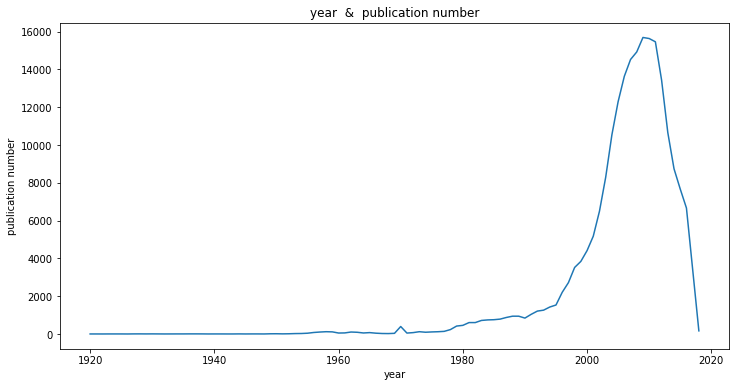

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.title('year  &  publication number')
plt.xlabel('year')
plt.ylabel('publication number')
plt.show()

##### ÁªìËÆ∫Ôºö
‰ªé‰∏äÂõæÂèØÁü•‰π¶ÁöÑÊï∞Èáè‰∏éÂπ¥‰ªΩ‰πãÈó¥ÁöÑÂÖ≥Á≥ª„ÄÇËá™1920Âπ¥Âà∞1970Âπ¥Â∑¶Âè≥‰π¶Á±çÂü∫Êú¨‰øùÊåÅÊØèÂπ¥Âõ∫ÂÆöÊï∞ÈáèÔºå1970Âπ¥ÂºÄÂßãÔºå‰π¶Á±çËøõÂÖ•Â¢ûÈïøÊúüÔºåÂ∞§ÂÖ∂ÊòØ2000Âπ¥Âà∞2010Âπ¥Â∑¶Âè≥ÁöÑ‰π¶Á±çÁñØÁãÇÂ¢ûÈïø„ÄÇ<br>
‰ªé2010Âπ¥ÂºÄÂßãÔºå‰π¶Á±çÂèëË°åÈáèÂºÄÂßã‰∏ãÈôçÔºåÂèØËÉΩÁöÑÂéüÂõ†Â¶Ç‰∏ãÔºö<br>
(1) ÁîµÂ≠ê‰π¶ÁöÑÊôÆÂèäÔºåÂØºËá¥ÂèëË°åÁâàÊú¨ÁöÑ‰π¶Á±çÂºÄÂßãÂáèÂ∞ëÔºõ<br>
(2) ÈÉ®ÂàÜ‰π¶Á±çË±ÜÁì£ÁõÆÂâçËøòÊú™Êî∂ÂΩï„ÄÇ

### 4. ÂàÜÊûê‰π¶Á±çÁöÑËØÑÂàÜ‰∏éÂπ¥‰ª£‰πãÈó¥ÊòØÂê¶ÊúâÊüêÁßçÂÖ≥Á≥ª

##### ÂàÜÊûêÔºö
Ê†πÊçÆÂπ¥‰ªΩÔºåËé∑ÂèñÊâÄÊúâËøô‰∏™Âπ¥‰ªΩÁöÑ‰π¶Á±çÔºåÂ∞ÜËøô‰∫õ‰π¶Á±çËÅöÈõÜËµ∑Êù•ÔºåÁÆóÂá∫‰ªñ‰ª¨ÁöÑÂπ≥ÂùáÂàÜÔºå‰Ωú‰∏∫Ëøô‰∏ÄÂπ¥‰ªΩÁöÑ‰π¶Á±çÁöÑËØÑÂàÜ„ÄÇ<br>
Ê†πÊçÆËøôÁßçÊÄùË∑ØÔºåËé∑Âèñ‰ªé1920Âπ¥Âà∞2018Âπ¥ÊØè‰∏ÄÂπ¥ÁöÑËØÑÂàÜÔºåÊúÄÂêéÁîªÂá∫‰π¶Á±çËØÑÂàÜ‰∏éÂπ¥‰ª£ÁöÑÂÖ≥Á≥ªÂõæ<br>
Âõ†‰∏∫Ê∂âÂèäÂà∞Âπ¥‰ªΩÔºåÊàë‰ª¨ÂèØ‰ª•Áõ¥Êé•Áî®‰∏ä‰∏Ä‰∏™ÂàÜÊûê‰∏≠Â∑≤ÁªèÂØπÂπ¥‰ªΩËøõË°åËøáÁ≠õÈÄâÁöÑÊï∞ÊçÆËøõË°åÊã∑Ë¥ù‰ΩøÁî®„ÄÇ

Ôºà1ÔºâÊã∑Ë¥ù‰∏Ä‰ªΩÂ§ÑÁêÜËøáÂπ¥‰ªΩÁöÑÊï∞ÊçÆ

In [24]:
data2 = data1.copy()
data2.head()

id      nid    title author  publisher translators  publication  \
0   2  1584537  ‰∏≠ÂõΩËØóÊ≠åÊ∫êÊµÅÂè≤    Ëé´ÊûóËôé  ‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ                     2002   
1   3  1394349      ÂÖÉËØóÂè≤     Êù®Èï∞    ‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ                     2003   
2   4  1203363   ‰∏≠ÂõΩÂ∞èËØ¥Âè≤Áï•     È≤ÅËøÖ    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ                     1998   
3   5  1200352   ÂîêÂÆãËØçÊµÅÊ¥æÂè≤    ÂàòÊâ¨Âø†    Á¶èÂª∫‰∫∫Ê∞ëÂá∫ÁâàÁ§æ                     2007   
4   6  1134261    ÂîêÂÆãËØçÂè≤ËÆ∫    ÁéãÂÖÜÈπè   \n                           2000   

  originalname framed           isbn pagenumber   price       books  \
0                      9787500429395               28.0        None   
1                  Âπ≥Ë£Ö  9787020042371        750   42.00        None   
2                  Âπ≥Ë£Ö  9787532523337        297   12.90       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   
3                      9787211033058        457  30.00ÂÖÉ        None   
4                      9787020030842        387  18.00ÂÖÉ  ‰∏≠ÂõΩÂè§ÂÖ∏ÊñáÂ≠¶Á†îÁ©∂‰∏õ‰π¶   

  numberofreviews score  
0              12   7.6  
1              16   7.5  
2            1081   9.1  
3                        
4              28   8.5

Ôºà2ÔºâÊï∞ÊçÆÊ∏ÖÊ¥óÔºåÂ§ÑÁêÜscoreËØÑÂàÜÈ°πÁº∫Â§±ÂíåÂºÇÂ∏∏ÂÄº

In [25]:
data2 = data2[(data2['score']!='')]     # ÂéªÊéâÊ≤°ÊúâËØÑÂàÜÁöÑÊï∞ÊçÆ
data2.head()

id      nid    title author  publisher translators  publication  \
0   2  1584537  ‰∏≠ÂõΩËØóÊ≠åÊ∫êÊµÅÂè≤    Ëé´ÊûóËôé  ‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ                     2002   
1   3  1394349      ÂÖÉËØóÂè≤     Êù®Èï∞    ‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ                     2003   
2   4  1203363   ‰∏≠ÂõΩÂ∞èËØ¥Âè≤Áï•     È≤ÅËøÖ    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ                     1998   
4   6  1134261    ÂîêÂÆãËØçÂè≤ËÆ∫    ÁéãÂÖÜÈπè   \n                           2000   
5   7  1002262    ÂÆãÂÖÉÊàèÊõ≤Âè≤    ÁéãÂõΩÁª¥    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ                     1998   

  originalname framed           isbn pagenumber   price       books  \
0                      9787500429395               28.0        None   
1                  Âπ≥Ë£Ö  9787020042371        750   42.00        None   
2                  Âπ≥Ë£Ö  9787532523337        297   12.90       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   
4                      9787020030842        387  18.00ÂÖÉ  ‰∏≠ÂõΩÂè§ÂÖ∏ÊñáÂ≠¶Á†îÁ©∂‰∏õ‰π¶   
5                  Âπ≥Ë£Ö  9787532524884        167  12.00ÂÖÉ       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   

  numberofreviews score  
0              12   7.6  
1              16   7.5  
2            1081   9.1  
4              28   8.5  
5             436   9.0

In [26]:
len(data2)

149345

In [27]:
scores = []
for score in data2['score']:
    score = float(score)
    scores.append(score)
data2['score'] = scores
len(scores)

149345

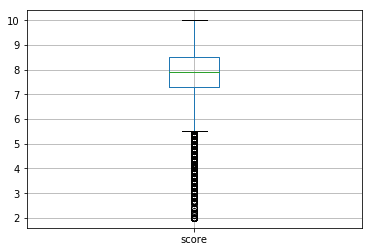

In [28]:
data2[['score']].boxplot()
plt.show()

Ê†πÊçÆ‰∏äÈù¢ÁöÑÁÆ±Á∫øÂõæÔºåÊúâÂæàÂ§ß‰∏ÄÈÉ®ÂàÜËØÑÂàÜË∂ÖÂá∫ÊûÅÈôêÂÄºÔºåËÄÉËôëÂà∞Êï∞ÊçÆÁöÑÂáÜÁ°ÆÊÄßÔºåËøôÈáåÂ∞±‰∏çÂÜçÂà†Èô§ËøôÈÉ®ÂàÜÊï∞ÊçÆ‰∫Ü<br>
Âè™ÂØπËØÑÂàÜÂà§Êñ≠‰∏Ä‰∏ãÊúÄÈ´òÂàÜÂíåÊúÄ‰ΩéÂàÜ

In [29]:
data2 = data2[(data2['score']>0) & (data2['score']<=10)]

In [30]:
len(data2)

149345

‰∏é‰∏äÈù¢Áõ∏ÂêåÔºåËØ¥Êòédata2‰∏≠ÊâÄÊúâÊï∞ÊçÆÈÉΩÊ≠£Â∏∏ÔºåÊó†ÂºÇÂ∏∏ÂÄº

Ôºà3ÔºâËé∑ÂèñÊØè‰∏ÄÂπ¥ÊâÄÊúâ‰π¶Á±çËØÑÂàÜÁöÑÂπ≥ÂùáÂÄº

In [31]:
x

array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [32]:
y_score = np.zeros(2019-1920)
y_score

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
y_num = np.zeros(2019-1920, dtype=int)
y_num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
data2.head()

id      nid    title author  publisher translators  publication  \
0   2  1584537  ‰∏≠ÂõΩËØóÊ≠åÊ∫êÊµÅÂè≤    Ëé´ÊûóËôé  ‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ                     2002   
1   3  1394349      ÂÖÉËØóÂè≤     Êù®Èï∞    ‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ                     2003   
2   4  1203363   ‰∏≠ÂõΩÂ∞èËØ¥Âè≤Áï•     È≤ÅËøÖ    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ                     1998   
4   6  1134261    ÂîêÂÆãËØçÂè≤ËÆ∫    ÁéãÂÖÜÈπè   \n                           2000   
5   7  1002262    ÂÆãÂÖÉÊàèÊõ≤Âè≤    ÁéãÂõΩÁª¥    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ                     1998   

  originalname framed           isbn pagenumber   price       books  \
0                      9787500429395               28.0        None   
1                  Âπ≥Ë£Ö  9787020042371        750   42.00        None   
2                  Âπ≥Ë£Ö  9787532523337        297   12.90       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   
4                      9787020030842        387  18.00ÂÖÉ  ‰∏≠ÂõΩÂè§ÂÖ∏ÊñáÂ≠¶Á†îÁ©∂‰∏õ‰π¶   
5                  Âπ≥Ë£Ö  9787532524884        167  12.00ÂÖÉ       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   

  numberofreviews  score  
0              12    7.6  
1              16    7.5  
2            1081    9.1  
4              28    8.5  
5             436    9.0

In [35]:
data2.index = range(len(data2))    # ÈáçÁΩÆindex

In [36]:
data2.head()

id      nid    title author  publisher translators  publication  \
0   2  1584537  ‰∏≠ÂõΩËØóÊ≠åÊ∫êÊµÅÂè≤    Ëé´ÊûóËôé  ‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ                     2002   
1   3  1394349      ÂÖÉËØóÂè≤     Êù®Èï∞    ‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ                     2003   
2   4  1203363   ‰∏≠ÂõΩÂ∞èËØ¥Âè≤Áï•     È≤ÅËøÖ    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ                     1998   
3   6  1134261    ÂîêÂÆãËØçÂè≤ËÆ∫    ÁéãÂÖÜÈπè   \n                           2000   
4   7  1002262    ÂÆãÂÖÉÊàèÊõ≤Âè≤    ÁéãÂõΩÁª¥    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ                     1998   

  originalname framed           isbn pagenumber   price       books  \
0                      9787500429395               28.0        None   
1                  Âπ≥Ë£Ö  9787020042371        750   42.00        None   
2                  Âπ≥Ë£Ö  9787532523337        297   12.90       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   
3                      9787020030842        387  18.00ÂÖÉ  ‰∏≠ÂõΩÂè§ÂÖ∏ÊñáÂ≠¶Á†îÁ©∂‰∏õ‰π¶   
4                  Âπ≥Ë£Ö  9787532524884        167  12.00ÂÖÉ       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   

  numberofreviews  score  
0              12    7.6  
1              16    7.5  
2            1081    9.1  
3              28    8.5  
4             436    9.0

In [37]:
%%time
publication2 = data2['publication']
for m in range(len(data2)):
    print(publication2[m])
    break

2002
CPU times: user 8.76 ms, sys: 3.37 ms, total: 12.1 ms
Wall time: 10.8 ms


In [38]:
publication2 = data2['publication']
score2 = data2['score']
print(len(publication2))
print(len(score2))

149345
149345


In [39]:
%%time
for m in range(len(data2)):
    index = 0
    for x_data in x:
        if publication2[m] == x_data:
            y_score[index] += score2[m]
            y_num[index] += 1
        index += 1

CPU times: user 2min 40s, sys: 270 ms, total: 2min 41s
Wall time: 2min 41s


In [40]:
y_score

array([7.80000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 9.00000e+00, 1.43000e+01,
       9.10000e+00, 7.60000e+00, 0.00000e+00, 7.80000e+00, 7.40000e+00,
       0.00000e+00, 8.00000e+00, 1.62000e+01, 1.63000e+01, 0.00000e+00,
       8.70000e+00, 8.10000e+00, 0.00000e+00, 7.70000e+00, 8.00000e+00,
       8.70000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.53000e+01,
       2.31000e+01, 2.68000e+01, 3.43000e+01, 5.23000e+01, 9.85000e+01,
       1.15000e+02, 3.44900e+02, 3.39600e+02, 6.08200e+02, 4.54200e+02,
       2.26800e+02, 2.32800e+02, 4.85500e+02, 4.30900e+02, 1.89200e+02,
       1.90900e+02, 1.00900e+02, 7.50000e+01, 5.41000e+01, 1.17700e+02,
       1.42730e+03, 2.21900e+02, 2.36800e+02, 5.20900e+02, 3.68900e+02,
       3.84800e+02, 4.52500e+02, 4.54800e+02, 1.19630e+03, 2.37170e+03,
       2.49630e+03, 3.23960e+03, 2.78980e+03, 3.31770e+03, 3.44910e+03,
       3.63210e+03, 3.60170e+03, 4.09330e+03, 3.98470e+03, 3.778

In [41]:
y_num

array([    1,     0,     0,     0,     0,     0,     0,     0,     1,
           2,     1,     1,     0,     1,     1,     0,     1,     2,
           2,     0,     1,     1,     0,     1,     1,     1,     0,
           0,     0,     4,     3,     3,     4,     6,    12,    14,
          41,    39,    73,    54,    27,    27,    57,    51,    23,
          23,    12,     9,     6,    14,   188,    26,    30,    63,
          45,    48,    54,    56,   140,   278,   295,   389,   331,
         398,   411,   439,   433,   498,   492,   461,   432,   566,
         646,   658,   842,   878,  1336,  1707,  2259,  2428,  2813,
        3372,  4235,  5586,  7263,  8735,  9766, 10438, 10707, 11248,
       11084, 10608,  9197,  7624,  6251,  5475,  4830,  2647,   119])

Âõ†‰∏∫Èô§Êï∞‰∏çËÉΩ‰∏∫0ÔºåÊâÄ‰ª•ÊàëÂ∞Ü‰∏™Êï∞‰∏∫0ÁöÑÂÖ®ÁΩÆ‰∏∫1ÔºåÂØπÊ±ÇÂπ≥ÂùáÂÄº‰∏çÂΩ±Âìç

In [42]:
index = 0
for i in y_num:
    if i==0:
        y_num[index] = 1
    index += 1
y_num

array([    1,     1,     1,     1,     1,     1,     1,     1,     1,
           2,     1,     1,     1,     1,     1,     1,     1,     2,
           2,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     4,     3,     3,     4,     6,    12,    14,
          41,    39,    73,    54,    27,    27,    57,    51,    23,
          23,    12,     9,     6,    14,   188,    26,    30,    63,
          45,    48,    54,    56,   140,   278,   295,   389,   331,
         398,   411,   439,   433,   498,   492,   461,   432,   566,
         646,   658,   842,   878,  1336,  1707,  2259,  2428,  2813,
        3372,  4235,  5586,  7263,  8735,  9766, 10438, 10707, 11248,
       11084, 10608,  9197,  7624,  6251,  5475,  4830,  2647,   119])

In [43]:
y2 = y_score/y_num
y2

array([7.8       , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 9.        , 7.15      ,
       9.1       , 7.6       , 0.        , 7.8       , 7.4       ,
       0.        , 8.        , 8.1       , 8.15      , 0.        ,
       8.7       , 8.1       , 0.        , 7.7       , 8.        ,
       8.7       , 0.        , 0.        , 0.        , 8.825     ,
       7.7       , 8.93333333, 8.575     , 8.71666667, 8.20833333,
       8.21428571, 8.41219512, 8.70769231, 8.33150685, 8.41111111,
       8.4       , 8.62222222, 8.51754386, 8.44901961, 8.22608696,
       8.3       , 8.40833333, 8.33333333, 9.01666667, 8.40714286,
       7.59202128, 8.53461538, 7.89333333, 8.26825397, 8.19777778,
       8.01666667, 8.37962963, 8.12142857, 8.545     , 8.53129496,
       8.4620339 , 8.32802057, 8.42839879, 8.33592965, 8.3919708 ,
       8.27357631, 8.31801386, 8.21947791, 8.09898374, 8.1967462 ,
       8.29490741, 8.32031802, 8.23065015, 8.20699088, 8.26460

Ôºà4ÔºâÁîªÂõæ

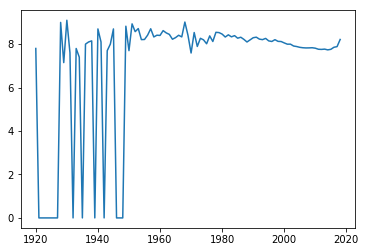

In [44]:
plt.plot(x, y2)
plt.show()

Áî±‰∫é1950Âπ¥‰πãÂâçÂæàÂ§öÂπ¥Ê≤°ÊúâËØÑÂàÜÔºåÈÉΩ‰∏∫0ÔºåÂØºËá¥Êï∞ÊçÆ‰∏çÁ®≥ÂÆöÔºå‰∏ãÈù¢Êàë‰ª¨‰ªé1950Âπ¥ÂºÄÂßãËøõË°åÊï∞ÊçÆÂàÜÊûê

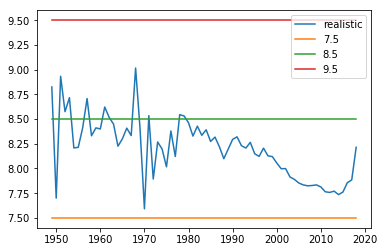

In [45]:
plt.plot(x[-70:], y2[-70:], label='realistic')
plt.plot(x[-70:], np.full(70, 7.5), label='7.5')
plt.plot(x[-70:], np.full(70, 8.5), label='8.5')
plt.plot(x[-70:], np.full(70, 9.5), label='9.5')
plt.legend()
plt.show()

##### ÁªìËÆ∫Ôºö
‰ªé‰∏äÂõæÂèØ‰ª•ÁúãÂá∫<br>
Ôºà1Ôºâ2000Âπ¥‰πãÂâçÂá∫ÁâàÁöÑ‰π¶Á±çËØÑÂàÜÁõ∏ÂØπËæÉÈ´ò‰∏ÄÁÇπ„ÄÇÂèØËÉΩÊòØÂõ†‰∏∫2000Âπ¥Âêé‰π¶Á±çÊ≥õÊª•ÔºåÂØºËá¥‰π¶Á±çÂÜÖÂÆπÁöÑË¥®Èáè‰∏çÈ´òÔºåÊâÄ‰ª•ËØÑÂàÜÁõ∏ÂØπË¶Å‰Ωé‰∏Ä‰∫õÔºõ<br>
Ôºà2Ôºâ‰ªé1980Âπ¥ÂºÄÂßãÔºåÂêéÊúüÁöÑ‰π¶Á±çËØÑÂàÜÂá†‰πé‰∏ÄÁõ¥Âú®Èôç‰ΩéÔºåÂèØËÉΩÊòØ‰π¶Á±çÂÜÖÂÆπË¥®ÈáèÈôç‰ΩéÂØºËá¥Ôºõ<br>
Ôºà3ÔºâÂ§ßÊ¶Ç‰ªé2015Âπ¥ÂºÄÂßãÔºå‰π¶Á±çÁöÑËØÑÂàÜÊúâÊâÄ‰∏äÂçáÔºåÂèØËÉΩÊòØÁîµÂ≠ê‰π¶Á±çÂ¢ûÂ§öÔºåÁ∫∏Ë¥®‰π¶Êõ¥Âä†Ê≥®ÈáçÂÜÖÂÆπÁöÑË¥®Èáè‰∫ÜÔºåÊâÄ‰ª•ËØÑÂàÜÊúâÊâÄÊèêÈ´ò„ÄÇ<br>

### 5. ‰π¶Á±çÁöÑ‰ª∑Ê†º‚ºÄËà¨ÈÉΩÊòØÂú®‰ªÄ‰πàËåÉÂõ¥

In [46]:
data.head()

id      nid    title author  publisher translators publication  \
0   2  1584537  ‰∏≠ÂõΩËØóÊ≠åÊ∫êÊµÅÂè≤    Ëé´ÊûóËôé  ‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ                  2002.4   
1   3  1394349      ÂÖÉËØóÂè≤     Êù®Èï∞    ‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ                    2003   
2   4  1203363   ‰∏≠ÂõΩÂ∞èËØ¥Âè≤Áï•     È≤ÅËøÖ    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ              1998-01-01   
3   5  1200352   ÂîêÂÆãËØçÊµÅÊ¥æÂè≤    ÂàòÊâ¨Âø†    Á¶èÂª∫‰∫∫Ê∞ëÂá∫ÁâàÁ§æ                  2007-4   
4   6  1134261    ÂîêÂÆãËØçÂè≤ËÆ∫    ÁéãÂÖÜÈπè   \n                        2000-1   

  originalname framed           isbn pagenumber   price       books  \
0                      9787500429395               28.0        None   
1                  Âπ≥Ë£Ö  9787020042371        750   42.00        None   
2                  Âπ≥Ë£Ö  9787532523337        297   12.90       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   
3                      9787211033058        457  30.00ÂÖÉ        None   
4                      9787020030842        387  18.00ÂÖÉ  ‰∏≠ÂõΩÂè§ÂÖ∏ÊñáÂ≠¶Á†îÁ©∂‰∏õ‰π¶   

  numberofreviews score  
0              12   7.6  
1              16   7.5  
2            1081   9.1  
3                        
4              28   8.5

Ôºà1ÔºâÂØπ‰ª∑Ê†ºËøô‰∏ÄÂàóÁöÑÊï∞ÊçÆËøõË°åÊ∏ÖÊ¥ó

In [47]:
data3 = data.copy()

ÂÖàÂèñÂá∫‰ª∑Ê†º‰∏∫Á©∫ÁöÑÊï∞ÊçÆ

In [48]:
data3['price'].isnull().sum()

0

In [49]:
(data3['price']=='').sum()

11079

In [50]:
data3 = data3[(data3['price']!='')]
len(data3)

213556

In [51]:
data3.head()

id      nid    title author  publisher translators publication  \
0   2  1584537  ‰∏≠ÂõΩËØóÊ≠åÊ∫êÊµÅÂè≤    Ëé´ÊûóËôé  ‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ                  2002.4   
1   3  1394349      ÂÖÉËØóÂè≤     Êù®Èï∞    ‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ                    2003   
2   4  1203363   ‰∏≠ÂõΩÂ∞èËØ¥Âè≤Áï•     È≤ÅËøÖ    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ              1998-01-01   
3   5  1200352   ÂîêÂÆãËØçÊµÅÊ¥æÂè≤    ÂàòÊâ¨Âø†    Á¶èÂª∫‰∫∫Ê∞ëÂá∫ÁâàÁ§æ                  2007-4   
4   6  1134261    ÂîêÂÆãËØçÂè≤ËÆ∫    ÁéãÂÖÜÈπè   \n                        2000-1   

  originalname framed           isbn pagenumber   price       books  \
0                      9787500429395               28.0        None   
1                  Âπ≥Ë£Ö  9787020042371        750   42.00        None   
2                  Âπ≥Ë£Ö  9787532523337        297   12.90       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   
3                      9787211033058        457  30.00ÂÖÉ        None   
4                      9787020030842        387  18.00ÂÖÉ  ‰∏≠ÂõΩÂè§ÂÖ∏ÊñáÂ≠¶Á†îÁ©∂‰∏õ‰π¶   

  numberofreviews score  
0              12   7.6  
1              16   7.5  
2            1081   9.1  
3                        
4              28   8.5

ÂéªÈô§Êéâ‰ª∑Ê†ºÂàóË°®Á§∫‰∏çËßÑËåÉÂØºËá¥Êó†Ê≥ïÂ§ÑÁêÜÁöÑÊï∞ÊçÆ

In [52]:
i = 0
new_data3 = []
for price in data3['price']:
    price = str(price)
    if re.match(r'.*?[0-9]+\.{0,1}[0-9]*.*?', price) != None:
        new_data3.append(data3.iloc[i])
#     else:
#         print(price)
    i += 1
len(new_data3)

213433

In [53]:
new_data3 = pd.DataFrame(new_data3)
len(new_data3)

213433

Ôºà2ÔºâÁªü‰∏Ä‰ª∑Ê†ºËøô‰∏ÄÂàóÁöÑÊ†ºÂºè

In [54]:
# ‰∏ãÈù¢Ëøô‰∏ÄÊÆµ‰ª£Á†ÅËé∑Âèñ‰π¶ÁöÑÂπ¥‰ªΩÂπ∂ËΩ¨‰∏∫4‰ΩçÊï∞Â≠óÂ≠óÁ¨¶ÊõøÊç¢ÂéüÊù•‰∏çÂêåËßÑÂàôÁöÑÂπ¥‰ªΩÔºåÊñπ‰æøÂêéÈù¢ÁªüËÆ°ÂàÜÊûê
new_prices = []
for price in new_data3.price:
    pricestr = str(price)
    pricestr = re.search(r'^.*?([0-9]+\.{0,1}[0-9]*).*$', pricestr).group(1)
    try:
        pricestr = float(pricestr)
    except:
        print(pricestr)
    new_prices.append(pricestr)
len(new_prices)

213433

In [55]:
new_data3['price'] = new_prices

In [56]:
new_data3.tail()

id       nid         title               author  publisher  \
224629  419806   1926747          Âæ∑ËØ≠ÈÄüÊàê                  ÁøüÊ∞∏Â∫ö      ËØëÊûóÂá∫ÁâàÁ§æ   
224630  419807   3869737        ÁëûÂÖ∏ËØ≠‰∏âÁôæÂè•  ÁéãÊ¢¶Ëææ|ÔºàÁëûÔºâLars|Bergman    Âåó‰∫¨Â§ßÂ≠¶Âá∫ÁâàÁ§æ   
224631  419810   4250737  Â§ßÁà≠‰πã‰∏ñ Âç∑ÂõõÔºöÂ§ßÁõúÊú¨Ëâ≤                              È´òÂØ∂   
224632  419814  11534920       ‰∏âÂõΩÊú∫ÂØÜÔºà‰∏ãÔºâ                  È©¨‰ºØÂ∫∏    Ê±üËãè‰∫∫Ê∞ëÂá∫ÁâàÁ§æ   
224634  419816  25734399     Èî¶Ë°£Â§úË°å5¬∑ÈÄçÈÅ•Ê∏∏                   ÊúàÂÖ≥  ÊπñÂåóÂ∞ëÂπ¥ÂÑøÁ´•Âá∫ÁâàÁ§æ   

       translators  publication originalname framed           isbn pagenumber  \
224629                  2006-11                 ÁÆÄË£ùÊú¨  9787806577660        612   
224630                 2009-6-1                  Âπ≥Ë£Ö  9787301152140      250 È°µ   
224631              2010Âπ¥01Êúà20Êó•                  Âπ≥Ë£ù  9789861854120        304   
224632                   2012-8                  Âπ≥Ë£Ö  9787214086341        367   
224634                   2013-7                  Âπ≥Ë£Ö  9787535390264        289   

        price books numberofreviews score  
224629   36.0  None              24   8.0  
224630   25.0  None              24   8.2  
224631  260.0  Â§ßÁà≠‰πã‰∏ñ              55   7.3  
224632   36.0  ‰∏âÂõΩÊú∫ÂØÜ            3585   7.9  
224634   25.0  Èî¶Ë°£Â§úË°å              38   7.9

Ôºà3ÔºâÂØπ‰ª∑Ê†ºÊï∞ÊçÆÂºÇÂ∏∏ÂÄºËøõË°åÂà§Êñ≠ÂíåÂ§ÑÁêÜ

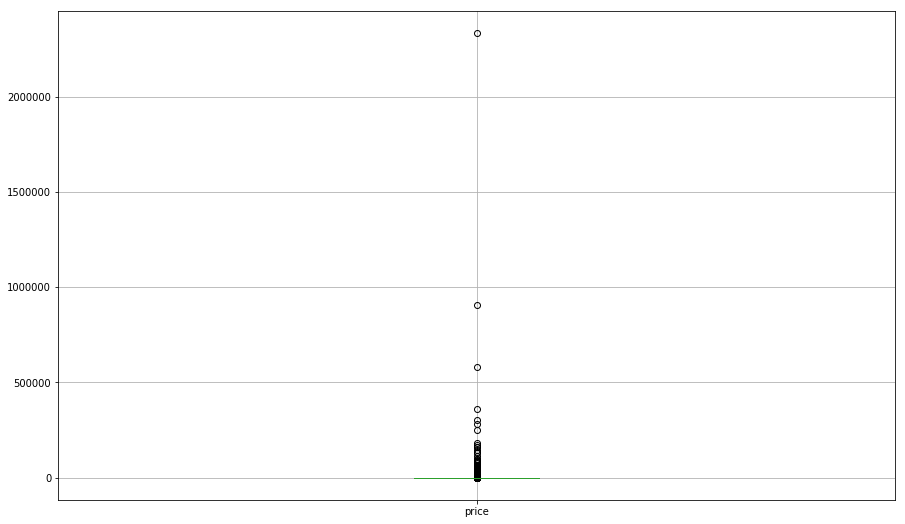

In [57]:
plt.figure(figsize=(15,9))
new_data3[['price']].boxplot()
plt.show()

In [58]:
prices = new_data3['price']

In [59]:
q_upper = prices.quantile(0.75)
q_upper

60.0

In [60]:
q_lower = prices.quantile(0.25)
q_lower

22.0

In [61]:
val = q_upper - q_lower
val

38.0

In [62]:
k = 1.5

In [63]:
new_data3 = new_data3[(new_data3['price'] < q_upper + k * val) & (new_data3['price'] > q_lower - k * val )]
len(new_data3)

182138

In [64]:
prices = new_data3['price']

(array([16706., 39913., 57503., 27461., 15836.,  9464.,  4798.,  4312.,
         4627.,  1518.]),
 array([  0.   ,  11.695,  23.39 ,  35.085,  46.78 ,  58.475,  70.17 ,
         81.865,  93.56 , 105.255, 116.95 ]),
 <a list of 10 Patch objects>)

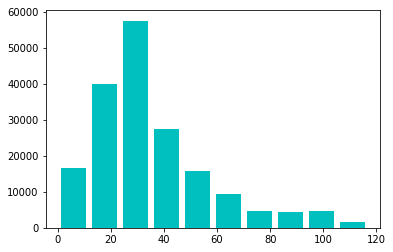

In [65]:
plt.hist(prices, color='c', rwidth=0.8)

In [66]:
import math
bins = math.ceil((prices.max() - prices.min())/10)
bins

12

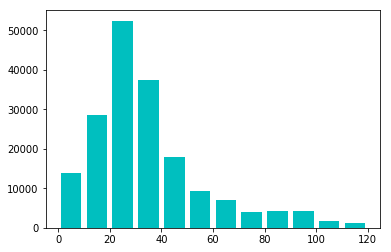

In [67]:
res = plt.hist(prices, color='c', rwidth=0.8, range=(0, 10*bins), bins=bins)
plt.show()

In [68]:
res

(array([13971., 28549., 52399., 37361., 17833.,  9392.,  6999.,  4097.,
         4339.,  4267.,  1825.,  1106.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120.]),
 <a list of 12 Patch objects>)

##### ÁªìËÆ∫Ôºö‰ªé‰∏äÈù¢ÁöÑÂõæÂíåÊï∞ÊçÆÂèØÁü•ÔºöÂ§ßÈÉ®ÂàÜ‰π¶ÁöÑ‰ª∑Ê†ºÂú®0-60‰πãÈó¥ÔºåÂÖ∂‰∏≠20-30ÊúÄÂ§ö„ÄÇ

## 6„ÄÅÂá∫ÁâàÁöÑ‰π¶Á±çÊúÄÂ§öÁöÑÂâç20‰∏™Âá∫ÁâàÁ§æ

In [69]:
data4 = data.copy()

In [70]:
data4.head()

id      nid    title author  publisher translators publication  \
0   2  1584537  ‰∏≠ÂõΩËØóÊ≠åÊ∫êÊµÅÂè≤    Ëé´ÊûóËôé  ‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ                  2002.4   
1   3  1394349      ÂÖÉËØóÂè≤     Êù®Èï∞    ‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ                    2003   
2   4  1203363   ‰∏≠ÂõΩÂ∞èËØ¥Âè≤Áï•     È≤ÅËøÖ    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ              1998-01-01   
3   5  1200352   ÂîêÂÆãËØçÊµÅÊ¥æÂè≤    ÂàòÊâ¨Âø†    Á¶èÂª∫‰∫∫Ê∞ëÂá∫ÁâàÁ§æ                  2007-4   
4   6  1134261    ÂîêÂÆãËØçÂè≤ËÆ∫    ÁéãÂÖÜÈπè   \n                        2000-1   

  originalname framed           isbn pagenumber   price       books  \
0                      9787500429395               28.0        None   
1                  Âπ≥Ë£Ö  9787020042371        750   42.00        None   
2                  Âπ≥Ë£Ö  9787532523337        297   12.90       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   
3                      9787211033058        457  30.00ÂÖÉ        None   
4                      9787020030842        387  18.00ÂÖÉ  ‰∏≠ÂõΩÂè§ÂÖ∏ÊñáÂ≠¶Á†îÁ©∂‰∏õ‰π¶   

  numberofreviews score  
0              12   7.6  
1              16   7.5  
2            1081   9.1  
3                        
4              28   8.5

In [71]:
data4['publisher'].isnull().sum()

0

In [72]:
(data4['publisher'] == '').sum()

16593

In [73]:
data4 = data4[data4['publisher'] != '']
len(data4)

208042

In [74]:
publisher_num = data4.drop_duplicates(['publisher'])    # Á≠õÈÄâÂá∫ÁâàÁ§æ‰∏çÈáçÂ§çÁöÑ‰∏ÄÁªÑÊï∞ÊçÆ

In [75]:
publisher_num.tail()

id       nid                   title  \
224578  419611   1904607                  ÂåøÈæôÂØÜËØ≠ 1   
224598  419663   3890046                 Ê∞¥Á•ûÁöÑÊñ∞Â®ò 1   
224606  419686  21319773                 Á¶Å„Åò„Çâ„Çå„ÅüÊàØ„Å≥   
224617  419743   2075618                Ë∫´È´î¬∑ÊÄßÂà•¬∑ÈöéÁ¥ö   
224627  419801  26919515  Rivstart A1+A2 Textbok   

                                    author     publisher translators  \
224578                                  Â∞è‰∫ë           ÂÜ¨Êó•Á§æ               
224598                             Â∞πÁæéÂ∫ö|Ïú§ÎØ∏Í≤Ω        ÏÑúÏö∏ Î¨∏ÌôîÏÇ¨               
224606                            Â±±ËóçÁ¥´Âß´Â≠ê|Ëò≠‰∏∏     Ëä±‰∏∏ÊñáÂ∫´black               
224617                                 ÂäâËãëÂ¶Ç       ‰∏≠ÂúãÊñáÂì≤Á†îÁ©∂ÊâÄ               
224627  Paula Levy Scherrer|Karl Lindemalm  Natur&Kultur               

       publication originalname     framed           isbn pagenumber    price  \
224578        2005                          9789889940003               HK 30   
224598    2006-6-2     ÌïòÎ∞±Ïùò Ïã†Î∂Ä 1             9788953272491                       
224606      2013-3                          9784592851011                 690   
224617  2002-12-31                 25Èñã  1ÂÜä  9789576719288        241  NT$320ÂÖÉ   
224627        2014               Paperback  9789127434202        240            

       books numberofreviews score  
224578  None              59   9.4  
224598  None             165   7.3  
224606  None              39   8.6  
224617  None                        
224627  None

In [76]:
publisher_num.index = np.arange(len(publisher_num)) # ÈáçÁΩÆÁõÆÂΩï

In [77]:
publisher_num.tail()

id       nid                   title  \
13538  419611   1904607                  ÂåøÈæôÂØÜËØ≠ 1   
13539  419663   3890046                 Ê∞¥Á•ûÁöÑÊñ∞Â®ò 1   
13540  419686  21319773                 Á¶Å„Åò„Çâ„Çå„ÅüÊàØ„Å≥   
13541  419743   2075618                Ë∫´È´î¬∑ÊÄßÂà•¬∑ÈöéÁ¥ö   
13542  419801  26919515  Rivstart A1+A2 Textbok   

                                   author     publisher translators  \
13538                                  Â∞è‰∫ë           ÂÜ¨Êó•Á§æ               
13539                             Â∞πÁæéÂ∫ö|Ïú§ÎØ∏Í≤Ω        ÏÑúÏö∏ Î¨∏ÌôîÏÇ¨               
13540                            Â±±ËóçÁ¥´Âß´Â≠ê|Ëò≠‰∏∏     Ëä±‰∏∏ÊñáÂ∫´black               
13541                                 ÂäâËãëÂ¶Ç       ‰∏≠ÂúãÊñáÂì≤Á†îÁ©∂ÊâÄ               
13542  Paula Levy Scherrer|Karl Lindemalm  Natur&Kultur               

      publication originalname     framed           isbn pagenumber    price  \
13538        2005                          9789889940003               HK 30   
13539    2006-6-2     ÌïòÎ∞±Ïùò Ïã†Î∂Ä 1             9788953272491                       
13540      2013-3                          9784592851011                 690   
13541  2002-12-31                 25Èñã  1ÂÜä  9789576719288        241  NT$320ÂÖÉ   
13542        2014               Paperback  9789127434202        240            

      books numberofreviews score  
13538  None              59   9.4  
13539  None             165   7.3  
13540  None              39   8.6  
13541  None                        
13542  None

In [78]:
publishers = publisher_num['publisher']    # Ëé∑ÂèñÂà∞ÊâÄÊúâÂá∫ÁâàÁ§æÁöÑ‰∏Ä‰∏™ÂàóË°®

In [79]:
type(publishers)

pandas.core.series.Series

In [80]:
publishers[0]

'‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ'

In [81]:
num_of_publishers = np.zeros(len(publishers), dtype=int)
num_of_publishers

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
%%time
for one in data4['publisher']:
    index = 0
    for publisher in publishers:
        if one == publisher:
            num_of_publishers[index] += 1 
        index += 1

CPU times: user 11min 4s, sys: 1.83 s, total: 11min 6s
Wall time: 11min 10s


In [83]:
num_of_publishers

array([1490, 3233, 1717, ...,    1,    1,    1])

In [88]:
nums = num_of_publishers.copy()

In [94]:
nums

array([1490, 3233, 1717, ...,    1,    1,    1])

In [97]:
list_nums = list(nums)   # Â∞ÜnparrayËΩ¨‰∏∫listÔºåÊñπ‰æøÂêéÈù¢ÈÄâÂèñÊúÄÂ§ßÁöÑ20‰∏™Êï∞ÁöÑÁ¥¢Âºï‰∏ãÊ†á
list_nums[:5]

[1490, 3233, 1717, 174, 736]

In [ ]:
‰∏ãÈù¢ÈÄöËøá‰ΩøÁî® heapq ÊâæÂá∫ÊúÄÂ§ßÁöÑ20‰∏™Êï∞ÁöÑÁ¥¢Âºï‰∏ãÊ†á

In [111]:
import heapq
# ÊúÄÂ§ßÁöÑ20‰∏™Êï∞ÁöÑÁ¥¢Âºï
max_num_index_list = map(list_nums.index, heapq.nlargest(20, list_nums))
max_num_index_list = list(max_num_index_list)

In [115]:
print(max_num_index_list)

[1, 112, 22, 12, 81, 110, 1090, 36, 101, 19, 24, 203, 104, 38, 2, 51, 151, 56, 0, 141]


È¶ñÂÖàÔºåÊ†πÊçÆÊéíÂ∫èÂêéÂâç20ÁöÑÁ¥¢ÂºïËé∑ÂèñÊéíÂâç20ÁöÑÊâÄÊúâÂá∫ÁâàÁ§æ

In [119]:
publishers_list =[]
for i in max_num_index_list:
    publishers_list.append(publishers[i])
print(publishers_list)

['‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ', 'Âåó‰∫¨Â§ßÂ≠¶Âá∫ÁâàÁ§æ', 'ÂïÜÂä°Âç∞‰π¶È¶Ü', '‰∏≠Âçé‰π¶Â±Ä', '‰∏≠‰ø°Âá∫ÁâàÁ§æ', '‰∏äÊµ∑ËØëÊñáÂá∫ÁâàÁ§æ', 'Êù±Á´ã', '‰∏≠ÂõΩ‰∫∫Ê∞ëÂ§ßÂ≠¶Âá∫ÁâàÁ§æ', '‰∏äÊµ∑‰∫∫Ê∞ëÂá∫ÁâàÁ§æ', 'Êú∫Ê¢∞Â∑•‰∏öÂá∫ÁâàÁ§æ', 'ÂπøË•øÂ∏àËåÉÂ§ßÂ≠¶Âá∫ÁâàÁ§æ', 'ËØëÊûóÂá∫ÁâàÁ§æ', '‰∫∫Ê∞ëÈÇÆÁîµÂá∫ÁâàÁ§æ', 'ÁîüÊ¥ª¬∑ËØª‰π¶¬∑Êñ∞Áü•‰∏âËÅî‰π¶Â∫ó', '‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ', 'Êñ∞ÊòüÂá∫ÁâàÁ§æ', 'Ê∏ÖÂçéÂ§ßÂ≠¶Âá∫ÁâàÁ§æ', 'ÁîµÂ≠êÂ∑•‰∏öÂá∫ÁâàÁ§æ', '‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ', 'Á§æ‰ºöÁßëÂ≠¶ÊñáÁåÆÂá∫ÁâàÁ§æ']


ÁÑ∂ÂêéÔºåÊ†πÊçÆÊéíÂ∫èÂêéÂâç20ÁöÑÁ¥¢ÂºïËé∑ÂèñÊéíÂâç20ÁöÑÊâÄÊúâÂá∫ÁâàÁ§æÁöÑÂá∫Áâà‰π¶Á±çÈáè

In [120]:
publish_num_list =[]
for i in max_num_index_list:
    publish_num_list.append(num_of_publishers[i])
print(publish_num_list)

[3233, 3214, 2904, 2749, 2522, 2514, 2321, 2212, 2211, 2174, 1983, 1849, 1813, 1758, 1717, 1663, 1643, 1599, 1490, 1248]


ÂºÄÂßãÁîªÂõæ

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['HiraginoSansGB-W3', 'PingFangSC-Regular', 'Microsoft YaHei', 'SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


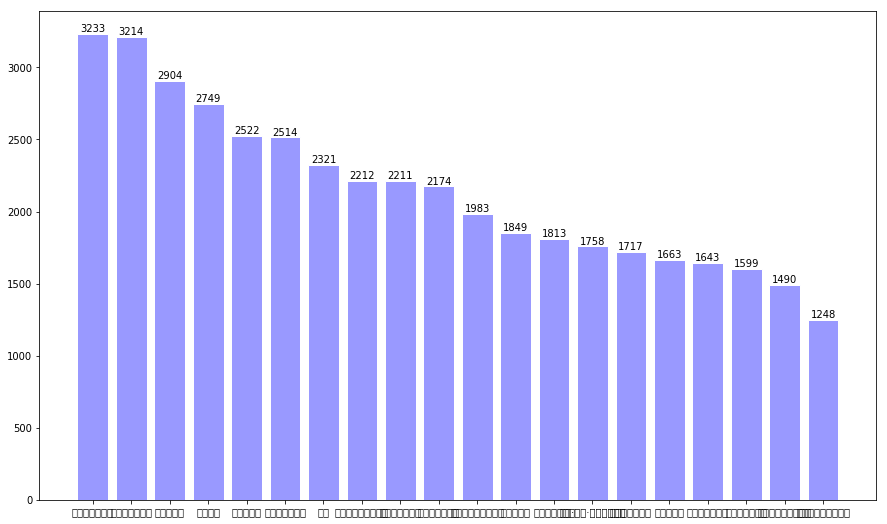

In [137]:
# plt.rc('font', **{'family' : 'HiraginoSansGB-W3, PingFangSC-Regular, Microsoft YaHei, SimHe'})
plt.figure(figsize=(15, 9))
plt.bar(publishers_list, publish_num_list, facecolor='#9999ff', edgecolor='white')
for x, y in zip(publishers_list, publish_num_list):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, y, '%d' % y, ha='center', va='bottom')
plt.show()

Áî±‰∫éMacÁ≥ªÁªüÁöÑÂéüÂõ†ÔºåËÆæÁΩÆÂêé‰πü‰∏çËÉΩÊ≠£Â∏∏ÊòæÁ§∫‰∏≠ÊñáÔºåÊâÄ‰ª•‰∏ãÈù¢ÊàëÂ∞Ü20‰∏™Âá∫ÁâàÁ§æ‰æùÊ¨°ÊéíÂá∫üëá

In [133]:
publishers_list

['‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ',
 'Âåó‰∫¨Â§ßÂ≠¶Âá∫ÁâàÁ§æ',
 'ÂïÜÂä°Âç∞‰π¶È¶Ü',
 '‰∏≠Âçé‰π¶Â±Ä',
 '‰∏≠‰ø°Âá∫ÁâàÁ§æ',
 '‰∏äÊµ∑ËØëÊñáÂá∫ÁâàÁ§æ',
 'Êù±Á´ã',
 '‰∏≠ÂõΩ‰∫∫Ê∞ëÂ§ßÂ≠¶Âá∫ÁâàÁ§æ',
 '‰∏äÊµ∑‰∫∫Ê∞ëÂá∫ÁâàÁ§æ',
 'Êú∫Ê¢∞Â∑•‰∏öÂá∫ÁâàÁ§æ',
 'ÂπøË•øÂ∏àËåÉÂ§ßÂ≠¶Âá∫ÁâàÁ§æ',
 'ËØëÊûóÂá∫ÁâàÁ§æ',
 '‰∫∫Ê∞ëÈÇÆÁîµÂá∫ÁâàÁ§æ',
 'ÁîüÊ¥ª¬∑ËØª‰π¶¬∑Êñ∞Áü•‰∏âËÅî‰π¶Â∫ó',
 '‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ',
 'Êñ∞ÊòüÂá∫ÁâàÁ§æ',
 'Ê∏ÖÂçéÂ§ßÂ≠¶Âá∫ÁâàÁ§æ',
 'ÁîµÂ≠êÂ∑•‰∏öÂá∫ÁâàÁ§æ',
 '‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ',
 'Á§æ‰ºöÁßëÂ≠¶ÊñáÁåÆÂá∫ÁâàÁ§æ']

## 7. ‰π¶Á±çËØÑÂàÜÊØîËæÉÈ´òÁöÑÂá∫ÁâàÁ§æ

##### ÂàÜÊûê
Ëøô‰∏™ÂàÜÊûêÊ∂âÂèäËØÑÂàÜÂíåÂá∫ÁâàÁ§æÔºåÂá∫ÁâàÁ§æÂèØ‰ª•Áõ¥Êé•‰ΩøÁî®‰∏ä‰∏Ä‰∏™ÂàÜÊûê‰∏≠ÂæóÂà∞ÁöÑÊâÄÊúâ‰∏çÈáçÂ§çÂá∫ÁâàÁ§æÁöÑ20‰∏™Êï∞ÊçÆ<br>
ËØÑÂàÜÂèØ‰ª•Âíå 4 ‰∏≠ÁöÑ‰∏ÄÊ†∑ÔºåÈááÁî®Ê±ÇÂä†ÊùÉÂπ≥ÂùáËØÑÂàÜÁöÑÊñπÂºè„ÄÇ<br>
ËØÑÂàÜËøôÈáå‰∏ÄÂàóÁöÑÊï∞ÊçÆÂèØ‰ª•Áõ¥Êé•‰ΩøÁî® 4 ‰∏≠ÁöÑÂ∑≤ÁªèÊ∏ÖÊ¥óËøáËØÑÂàÜÂêéÁöÑ data2 ÁöÑÊï∞ÊçÆ„ÄÇ

In [144]:
data5 = data2.copy()
len(data5)

149345

In [141]:
len(publishers)    # ÊâÄÊúâ‰∏çÈáçÂ§çÁöÑÂá∫ÁâàÁ§æ

13543

Âà∞ËøôÈáåÔºåÊàë‰ª¨Ëé∑ÂèñÂà∞‰∫ÜÊâÄÊúâÊúâËØÑÂàÜÁöÑÊÄªÊï∞ÊçÆ„ÄÅÊâÄÊúâÂá∫ÁâàÁ§æÁöÑÂêçÁß∞<br>
‰∏ã‰∏ÄÊ≠•ÔºåÊàë‰ª¨Â∞ÜÁªüËÆ°ÊØè‰∏Ä‰∏™Âá∫ÁâàÁ§æÁöÑÂπ≥ÂùáËØÑÂàÜ

In [168]:
y_score5 = np.zeros(len(publishers_list))
y_score5

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [169]:
y_num5 = np.zeros(len(publishers_list), dtype=int)
y_num5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [170]:
publishers5 = data5['publisher']  # ÊâÄÊúâÊï∞ÊçÆ‰∏≠ÁöÑÂá∫ÁâàÁ§æÂàó
score5 = data5['score']     # ÊâÄÊúâÊï∞ÊçÆ‰∏≠ÁöÑËØÑÂàÜÂàó
print(len(publishers5))
print(len(score5))

149345
149345


In [171]:
%%time
for m in range(len(score5)):
    index = 0
    for x in publishers_list:
        if publishers5[m] == x:
            y_score5[index] += score5[m]
            y_num5[index] += 1
        index += 1

CPU times: user 31.3 s, sys: 51.8 ms, total: 31.4 s
Wall time: 31.5 s


In [173]:
y_score5

array([23572.4, 19307.5, 16789.4, 17193.8, 17977.4, 18708.5, 13580.1,
       13497.2, 14339.2, 11704.8, 14206. , 14025.7, 11288.9, 13243.9,
        9666.3, 12373.5,  7992.1,  8554.5,  6350.7,  5614.3])

In [174]:
y_num5

array([2911, 2434, 2067, 2081, 2369, 2298, 1594, 1729, 1806, 1529, 1806,
       1741, 1442, 1637, 1154, 1622, 1033, 1134,  806,  727])

Âõ†‰∏∫Èô§Êï∞‰∏çËÉΩ‰∏∫0ÔºåÊâÄ‰ª•ÊàëÂ∞Ü‰∏™Êï∞‰∏∫0ÁöÑÂÖ®ÁΩÆ‰∏∫1ÔºåÂØπÊ±ÇÂπ≥ÂùáÂÄº‰∏çÂΩ±Âìç

In [175]:
index = 0
for i in y_num5:
    if i==0:
        y_num5[index] = 1
    index += 1
y_num5

array([2911, 2434, 2067, 2081, 2369, 2298, 1594, 1729, 1806, 1529, 1806,
       1741, 1442, 1637, 1154, 1622, 1033, 1134,  806,  727])

Ê±ÇÂèñÊØè‰∏Ä‰∏™Âá∫ÁâàÁ§æÁöÑÂπ≥ÂùáÂàÜ

In [176]:
y5 = y_score5/y_num5
y5

array([8.09769839, 7.93241578, 8.12259313, 8.26227775, 7.58860279,
       8.14120975, 8.51951066, 7.80636206, 7.93975637, 7.65519948,
       7.86600221, 8.05611717, 7.82864078, 8.0903482 , 8.37634315,
       7.62854501, 7.73678606, 7.54365079, 7.8792804 , 7.72255846])

In [182]:
y5_list = list(y5)   # Â∞ÜnparrayËΩ¨‰∏∫listÔºåÊñπ‰æøÂêéÈù¢ÈÄâÂèñÊúÄÂ§ßÁöÑ20‰∏™Êï∞ÁöÑÁ¥¢Âºï‰∏ãÊ†á
import heapq
# ÊúÄÂ§ßÁöÑ20‰∏™Êï∞ÁöÑÁ¥¢Âºï
y5_list_index = map(y5_list.index, heapq.nlargest(20, y5_list))
y5_list_index = list(y5_list_index)
y5_list_index

[6, 14, 3, 5, 2, 0, 13, 11, 8, 1, 18, 10, 12, 7, 16, 19, 9, 15, 4, 17]

In [184]:
print(publishers_list)

['‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ', 'Âåó‰∫¨Â§ßÂ≠¶Âá∫ÁâàÁ§æ', 'ÂïÜÂä°Âç∞‰π¶È¶Ü', '‰∏≠Âçé‰π¶Â±Ä', '‰∏≠‰ø°Âá∫ÁâàÁ§æ', '‰∏äÊµ∑ËØëÊñáÂá∫ÁâàÁ§æ', 'Êù±Á´ã', '‰∏≠ÂõΩ‰∫∫Ê∞ëÂ§ßÂ≠¶Âá∫ÁâàÁ§æ', '‰∏äÊµ∑‰∫∫Ê∞ëÂá∫ÁâàÁ§æ', 'Êú∫Ê¢∞Â∑•‰∏öÂá∫ÁâàÁ§æ', 'ÂπøË•øÂ∏àËåÉÂ§ßÂ≠¶Âá∫ÁâàÁ§æ', 'ËØëÊûóÂá∫ÁâàÁ§æ', '‰∫∫Ê∞ëÈÇÆÁîµÂá∫ÁâàÁ§æ', 'ÁîüÊ¥ª¬∑ËØª‰π¶¬∑Êñ∞Áü•‰∏âËÅî‰π¶Â∫ó', '‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ', 'Êñ∞ÊòüÂá∫ÁâàÁ§æ', 'Ê∏ÖÂçéÂ§ßÂ≠¶Âá∫ÁâàÁ§æ', 'ÁîµÂ≠êÂ∑•‰∏öÂá∫ÁâàÁ§æ', '‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ', 'Á§æ‰ºöÁßëÂ≠¶ÊñáÁåÆÂá∫ÁâàÁ§æ']


È¶ñÂÖàÔºåÊ†πÊçÆÊéíÂ∫èÂêéÂâç20ÁöÑÁ¥¢ÂºïËé∑ÂèñÊéíÂâç20ÁöÑÊâÄÊúâÂá∫ÁâàÁ§æ

In [185]:
new_publishers_list =[]
for i in y5_list_index:
    new_publishers_list.append(publishers_list[i])
print(new_publishers_list)

['Êù±Á´ã', '‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ', '‰∏≠Âçé‰π¶Â±Ä', '‰∏äÊµ∑ËØëÊñáÂá∫ÁâàÁ§æ', 'ÂïÜÂä°Âç∞‰π¶È¶Ü', '‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ', 'ÁîüÊ¥ª¬∑ËØª‰π¶¬∑Êñ∞Áü•‰∏âËÅî‰π¶Â∫ó', 'ËØëÊûóÂá∫ÁâàÁ§æ', '‰∏äÊµ∑‰∫∫Ê∞ëÂá∫ÁâàÁ§æ', 'Âåó‰∫¨Â§ßÂ≠¶Âá∫ÁâàÁ§æ', '‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ', 'ÂπøË•øÂ∏àËåÉÂ§ßÂ≠¶Âá∫ÁâàÁ§æ', '‰∫∫Ê∞ëÈÇÆÁîµÂá∫ÁâàÁ§æ', '‰∏≠ÂõΩ‰∫∫Ê∞ëÂ§ßÂ≠¶Âá∫ÁâàÁ§æ', 'Ê∏ÖÂçéÂ§ßÂ≠¶Âá∫ÁâàÁ§æ', 'Á§æ‰ºöÁßëÂ≠¶ÊñáÁåÆÂá∫ÁâàÁ§æ', 'Êú∫Ê¢∞Â∑•‰∏öÂá∫ÁâàÁ§æ', 'Êñ∞ÊòüÂá∫ÁâàÁ§æ', '‰∏≠‰ø°Âá∫ÁâàÁ§æ', 'ÁîµÂ≠êÂ∑•‰∏öÂá∫ÁâàÁ§æ']


ÁÑ∂ÂêéÔºåÊ†πÊçÆÊéíÂ∫èÂêéÂâç20ÁöÑÁ¥¢ÂºïËé∑ÂèñÊéíÂâç20ÁöÑÊâÄÊúâÂá∫ÁâàÁ§æÁöÑÂá∫Áâà‰π¶Á±çÈáè

In [187]:
new_y5 =[]
for i in y5_list_index:
    new_y5.append(y5[i])
print(new_y5)

[8.519510664993696, 8.376343154246106, 8.262277751081205, 8.141209747606602, 8.122593130140281, 8.097698385434532, 8.090348197923024, 8.056117174037892, 7.939756367663341, 7.932415776499564, 7.879280397022335, 7.866002214839434, 7.828640776699034, 7.80636205899363, 7.736786060019366, 7.7225584594222845, 7.655199476782215, 7.6285450061652345, 7.588602785985649, 7.5436507936507935]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['HiraginoSansGB-W3', 'PingFangSC-Regular', 'Microsoft YaHei', 'SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


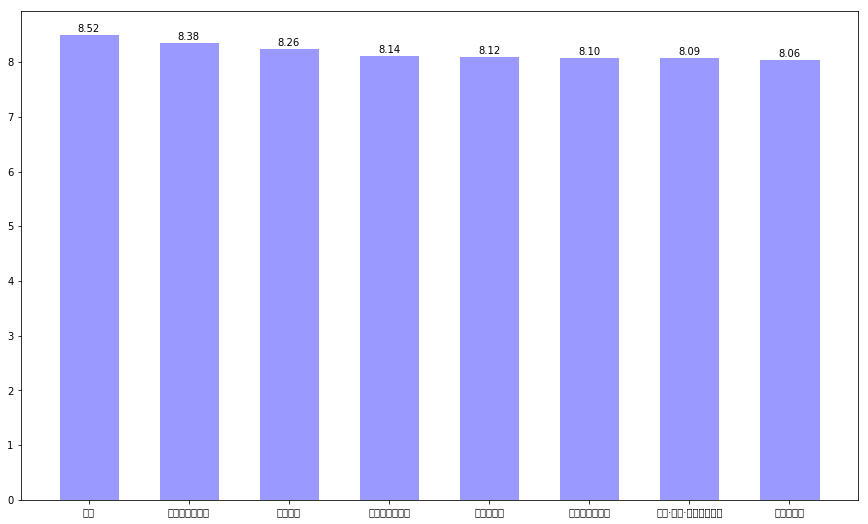

In [195]:
# plt.rc('font', **{'family' : 'HiraginoSansGB-W3, PingFangSC-Regular, Microsoft YaHei, SimHe'})
plt.figure(figsize=(15, 9))
plt.bar(new_publishers_list[:8], new_y5[:8], facecolor='#9999ff', edgecolor='white', width=0.6)
for x, y in zip(new_publishers_list[:8], new_y5[:8]):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text(x, y, '%.2f' % y, ha='center', va='bottom')
plt.show()

Áî±‰∫éMacÁ≥ªÁªüÁöÑÂéüÂõ†ÔºåËÆæÁΩÆÂêé‰πü‰∏çËÉΩÊ≠£Â∏∏ÊòæÁ§∫‰∏≠ÊñáÔºåÊâÄ‰ª•‰∏ãÈù¢ÊàëÂ∞Ü8‰∏™Âá∫ÁâàÁ§æ‰æùÊ¨°ÊéíÂá∫üëá

In [197]:
new_publishers_list[:8]

['Êù±Á´ã',
 '‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ',
 '‰∏≠Âçé‰π¶Â±Ä',
 '‰∏äÊµ∑ËØëÊñáÂá∫ÁâàÁ§æ',
 'ÂïÜÂä°Âç∞‰π¶È¶Ü',
 '‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ',
 'ÁîüÊ¥ª¬∑ËØª‰π¶¬∑Êñ∞Áü•‰∏âËÅî‰π¶Â∫ó',
 'ËØëÊûóÂá∫ÁâàÁ§æ']

## 8. Âá∫‰π¶Â§öÁöÑ‰ΩúËÄÖ

##### ÂàÜÊûêÔºö
È¶ñÂÖàÔºåËé∑ÂèñÂπ∂Ê∏ÖÊ¥óÊâÄÊúâÁöÑ‰ΩúËÄÖÔºåÂéªÊéâÁº∫Â§±ÂÄº<br>
ÁÑ∂ÂêéÔºåÊ†πÊçÆ‰ΩúËÄÖÂàóË°®ÔºåËé∑ÂèñÂà∞ÊØè‰∏Ä‰∏™‰ΩúËÄÖÁöÑ‰π¶Á±çÊï∞Èáè<br>
ËøõË°åÊéíÂ∫èÔºåÊéíÂ∫èÂêéÂèñ‰π¶Á±çÊúÄÂ§öÁöÑ10‰∏™‰ΩúËÄÖ

Ôºà1ÔºâÊï∞ÊçÆÊ∏ÖÊ¥ó

In [198]:
data.head()

id      nid    title author  publisher translators publication  \
0   2  1584537  ‰∏≠ÂõΩËØóÊ≠åÊ∫êÊµÅÂè≤    Ëé´ÊûóËôé  ‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ                  2002.4   
1   3  1394349      ÂÖÉËØóÂè≤     Êù®Èï∞    ‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ                    2003   
2   4  1203363   ‰∏≠ÂõΩÂ∞èËØ¥Âè≤Áï•     È≤ÅËøÖ    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ              1998-01-01   
3   5  1200352   ÂîêÂÆãËØçÊµÅÊ¥æÂè≤    ÂàòÊâ¨Âø†    Á¶èÂª∫‰∫∫Ê∞ëÂá∫ÁâàÁ§æ                  2007-4   
4   6  1134261    ÂîêÂÆãËØçÂè≤ËÆ∫    ÁéãÂÖÜÈπè   \n                        2000-1   

  originalname framed           isbn pagenumber   price       books  \
0                      9787500429395               28.0        None   
1                  Âπ≥Ë£Ö  9787020042371        750   42.00        None   
2                  Âπ≥Ë£Ö  9787532523337        297   12.90       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   
3                      9787211033058        457  30.00ÂÖÉ        None   
4                      9787020030842        387  18.00ÂÖÉ  ‰∏≠ÂõΩÂè§ÂÖ∏ÊñáÂ≠¶Á†îÁ©∂‰∏õ‰π¶   

  numberofreviews score  
0              12   7.6  
1              16   7.5  
2            1081   9.1  
3                        
4              28   8.5

In [248]:
data6 = data.copy()

In [249]:
data6 = data6[(data6['author']!='') & (data6['author']!=None)]      # Èô§ÂéªÁº∫Â§±ÂÄº

In [250]:
len(data6)

217676

In [251]:
len(data)

224635

Ôºà2ÔºâËé∑ÂèñÊâÄÊúâ‰ΩúËÄÖÔºåÂç≥ÂéªÊéâÈáçÂ§çÂÄº

In [252]:
authors = data6['author'].drop_duplicates()

In [253]:
len(authors)

134792

In [254]:
authors.head()

0    Ëé´ÊûóËôé
1     Êù®Èï∞
2     È≤ÅËøÖ
3    ÂàòÊâ¨Âø†
4    ÁéãÂÖÜÈπè
Name: author, dtype: object

In [255]:
author_book_num = np.zeros(len(authors))
author_book_num

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
%%time
all_author = data6['author']
for a in all_author:
    index = 0
    for b in authors:
        if a==b:
            author_book_num[index] += 1
        index += 1

In [ ]:
Áî±‰∫éÊï∞ÊçÆÈáèËææÂà∞20Â§ö‰∏áÔºåÂ§™Â§ßÔºåÁü≠Êó∂Èó¥ÂÜÖÊú¨Êú∫Êó†Ê≥ïÁÆóÂá∫Ôºå‰∏îËøòÊú™ÊâæÂà∞ÂêàÈÄÇÁöÑÁÆóÊ≥ïÔºåËøôÈÅìÈ¢òÊöÇÊó∂Âè™ËÉΩÊêÅÁΩÆ‰∫Ü„ÄÇ

## 9. ËØÑÂàÜÈ´ò‰∏éËØÑËÆ∫Êï∞Èáè‰πãÈó¥ÊòØÂê¶Â≠òÂú®ÊüêÁßçÂÖ≥Á≥ª

##### ÂàÜÊûêÔºö
È¶ñÂÖàËøõË°åÊï∞ÊçÆÊ∏ÖÊ¥óÔºåÂéªÊéâËØÑÂàÜÊàñËØÑËÆ∫Êï∞Èáè‰∏∫Á©∫„ÄÅÂÄºÂºÇÂ∏∏ÁöÑÊï∞ÊçÆ<br>
ÁÑ∂ÂêéÂú®Âêå‰∏Ä‰∏™Âõæ‰∏≠ÂàÜÂà´ÁîªÂá∫ËØÑÂàÜÂíåËØÑËÆ∫Êï∞ÈáèÁöÑÊäòÁ∫ø

In [216]:
data.head()

id      nid    title author  publisher translators publication  \
0   2  1584537  ‰∏≠ÂõΩËØóÊ≠åÊ∫êÊµÅÂè≤    Ëé´ÊûóËôé  ‰∏≠ÂõΩÁ§æ‰ºöÁßëÂ≠¶Âá∫ÁâàÁ§æ                  2002.4   
1   3  1394349      ÂÖÉËØóÂè≤     Êù®Èï∞    ‰∫∫Ê∞ëÊñáÂ≠¶Âá∫ÁâàÁ§æ                    2003   
2   4  1203363   ‰∏≠ÂõΩÂ∞èËØ¥Âè≤Áï•     È≤ÅËøÖ    ‰∏äÊµ∑Âè§Á±çÂá∫ÁâàÁ§æ              1998-01-01   
3   5  1200352   ÂîêÂÆãËØçÊµÅÊ¥æÂè≤    ÂàòÊâ¨Âø†    Á¶èÂª∫‰∫∫Ê∞ëÂá∫ÁâàÁ§æ                  2007-4   
4   6  1134261    ÂîêÂÆãËØçÂè≤ËÆ∫    ÁéãÂÖÜÈπè   \n                        2000-1   

  originalname framed           isbn pagenumber   price       books  \
0                      9787500429395               28.0        None   
1                  Âπ≥Ë£Ö  9787020042371        750   42.00        None   
2                  Âπ≥Ë£Ö  9787532523337        297   12.90       Ëì¨Ëé±ÈòÅ‰∏õ‰π¶   
3                      9787211033058        457  30.00ÂÖÉ        None   
4                      9787020030842        387  18.00ÂÖÉ  ‰∏≠ÂõΩÂè§ÂÖ∏ÊñáÂ≠¶Á†îÁ©∂‰∏õ‰π¶   

  numberofreviews score  
0              12   7.6  
1              16   7.5  
2            1081   9.1  
3                        
4              28   8.5

In [278]:
data7 = data.copy()

In [280]:
data7 = data7[(data7['score']!='')]
len(data7)

153426

In [281]:
scores7 = []
for score in data7['score']:
    score = float(score)
    scores7.append(score)
data7['score'] = scores7
len(scores7)

153426

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['HiraginoSansGB-W3', 'PingFangSC-Regular', 'Microsoft YaHei', 'SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


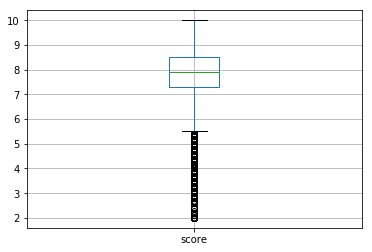

In [282]:
data7[['score']].boxplot()
plt.show()

In [283]:
data7.describe()

id          score
count  153426.000000  153426.000000
mean   166519.703662       7.882241
std    116456.539851       0.885802
min         2.000000       2.000000
25%     64160.250000       7.300000
50%    150448.500000       7.900000
75%    254361.750000       8.500000
max    419816.000000      10.000000

In [284]:
(8.5-7.3)*1.5

1.8000000000000003

In [285]:
data7 = data7[(data7['score']<=10) & (data7['score']>5.5)]

In [286]:
len(data7)

152026

In [287]:
data7 = data7[(data7['numberofreviews']!='') & (data7['numberofreviews']!=None) ]

In [288]:
len(data7)

152026

In [306]:
numberofreviews7 = []
for numberofreview in data7['numberofreviews']:
    numberofreview = int(numberofreview)
    numberofreviews7.append(numberofreview)
data7['numberofreviews'] = numberofreviews7
len(numberofreviews7)

152026

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['HiraginoSansGB-W3', 'PingFangSC-Regular', 'Microsoft YaHei', 'SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


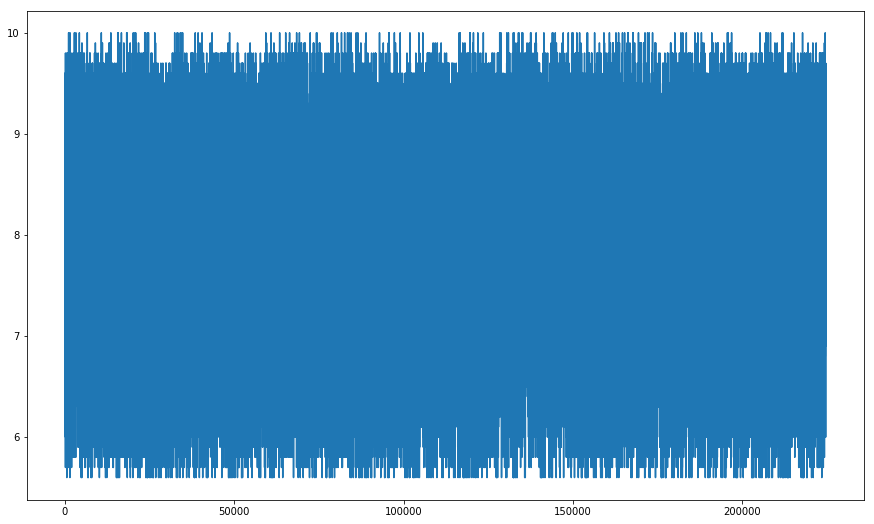

In [319]:
plt.figure(figsize=(15, 9))
data7['score'].plot()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['HiraginoSansGB-W3', 'PingFangSC-Regular', 'Microsoft YaHei', 'SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


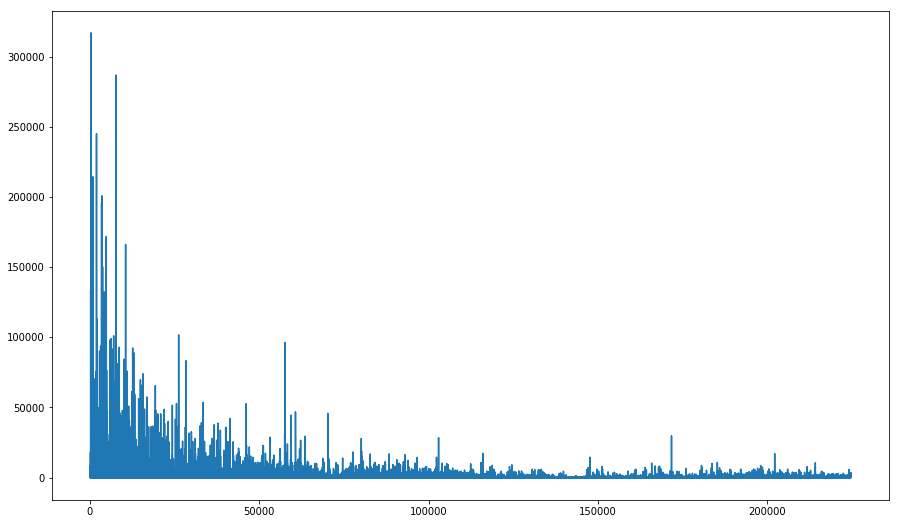

In [314]:
plt.figure(figsize=(15, 9))
data7['numberofreviews'].plot()
plt.show()

##### ÁªìËÆ∫Ôºö‰ªé‰∏äÈù¢‰∏§‰∏™ÂõæÂèØÁü•ÔºåËØÑÂàÜÈ´ò‰∏éËØÑËÆ∫Êï∞Èáè‰πãÈó¥Ê≤°ÊúâÂ§™Â§ßÁöÑÂÖ≥Á≥ª„ÄÇ